In [1]:
'''
7/22/2024

H2 Immiscibility PySR Code V2b
Data: Computational
Operators: log, sin, cos, tan, abs
Maxdepth and maxsize: Included

Create 6 versions of the code:
w/ Computational data:
- V1a: Fit w/ log as the unary operator
- V1b: V1a w/ maxdepth and maxsize
- V2a: Fit w/ sin, cos, etc. log as unary operator
- V2b: V2a w/ maxdepth and maxsize

w/ Computational & Experimental data:
- V3a: Fit w/ sin, cos, log etc.
- V3b: V3a w/ maxdepth and maxsize


- Meet 7/24/2024 @ 4pm
- Meet 7/28/2024 @ 4pm
'''

## SHARED WITH Malik B -- 20240711

import numpy as np
from pysr import PySRRegressor
!pip install matplotlib
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
#The following are the parameters estimated based on DFT calculations
W_V = -13.06
W_U = -299.54
W_S = -8.04
W_V2 = 490.89
lambda_X1 = 2.62
lambda_X2 = -0.68

R_const = 8.314 # J/mol-K -- gas constant
grid_size = 10000

In [3]:
#get random samples of T
# T_mock_arr = np.random.uniform(750,6000,grid_size)
T_mock_data = np.array([750, 1000, 1500, 2000, 3000, 4000])
# T_mock_arr = np.zeros((grid_size))
T_mock_arr = np.random.choice(T_mock_data, grid_size)
# T_mock_arr = T_mock_arr + 3000
# T_mock_arr = np.linspace(750,6000,grid_size)

#get random samples of X_H2
XH2_mock_arr = np.random.uniform(0.01,0.99,grid_size)
# XH2_mock_arr = np.linspace(0.01,0.99,grid_size) # X_H2

T_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_arr = []#np.zeros((grid_size,grid_size,grid_size))
XH2_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_norm_arr = []

################################################################################################
# This function is basically f(X_H2,T,P) = 0; X_H2O = 1 - X_H2
################################################################################################

In [4]:
len(T_mock_arr), T_mock_arr

(10000, array([1000, 1500, 2000, ..., 2000, 3000, 1500]))

In [5]:
def est_W_params_w_Y(T_d, Y_d, W_V, W_U, W_S, W_V2=0, W_V3=0, W_V4=0, flag_return_value=0):

    temp1 = (W_V + (((T_d/1000)**(-2))*W_V2))
    temp2 = (R_const*T_d*(np.log( Y_d/(1-Y_d) )) )/(2.*(2*Y_d - 1))
    temp3 = W_U - (T_d)*W_S
    P_est = (temp2 - temp3)/temp1

    if flag_return_value == 1:  
        return temp1 # W_V_eff
    if flag_return_value == 2:  
        return temp3 # W_0 or W_U - T*W_S
    else:
        return P_est
################################################################################################
################################################################################################

In [6]:
def est_lambda_X_eff(T_d, lambda_X1, lambda_X2, flag_return_value=0):

    lambda_X_eff = lambda_X1 + (lambda_X2/(T_d/1000))

    return lambda_X_eff
################################################################################################
################################################################################################

In [7]:

X_mock_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr = []

for ind1 in range(len(T_mock_data)):
    P_arr_T = []
    for ind2 in range(len(X_mock_P_min)):
        T_mock = T_mock_data[ind1]
        X_mock = X_mock_P_min[ind2]
    
        lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
        lambda_X = lambda_X_eff
        
        Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
        
        P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )
    
        P_arr_T = np.append(P_arr_T, P_mock)

    P_min_arr = np.append(P_min_arr, np.min(P_arr_T))



In [8]:
print(P_min_arr)

[ 0.58750681  1.20030473  3.46413402  7.72863786 27.03597702 79.19965634]


In [9]:
################################################################################################
# This is for creating an array for immiscibility curve
################################################################################################
# for ind2 in range(len(XH2_mock_arr)):
for ind1 in range(len(T_mock_arr)):
    T_mock = T_mock_arr[ind1]
    X_mock = XH2_mock_arr[ind1]

    lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
    lambda_X = lambda_X_eff
    
    Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
    
    P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )

    T_arr = np.append(T_arr, T_mock)
    P_arr = np.append(P_arr, P_mock)
    XH2_arr = np.append(XH2_arr, X_mock)

    if(T_mock == 750):
        P_mock_norm = P_mock/P_min_arr[0]
    if(T_mock == 1000):
        P_mock_norm = P_mock/P_min_arr[1]
    if(T_mock == 1500):
        P_mock_norm = P_mock/P_min_arr[2]
    if(T_mock == 2000):
        P_mock_norm = P_mock/P_min_arr[3]
    if(T_mock == 3000):
        P_mock_norm = P_mock/P_min_arr[4]
    if(T_mock == 4000):
        P_mock_norm = P_mock/P_min_arr[5]

    P_norm_arr = np.append(P_norm_arr, P_mock_norm)
        
################################################################################################
################################################################################################

In [10]:
## Use arrays T_arr, P_arr, XH2_arr as your "X" and "Y"

# Use XH_2_arr and T_arr as the independent variables (X)
X = np.column_stack((XH2_arr, T_arr))

# Use P_arr as the dependent variable (Y)
Y = P_norm_arr

In [11]:
# Instantiate and fit PySRRegressor
model = PySRRegressor(
        niterations=40,
        binary_operators=["+", "*", "-", "/"],
        unary_operators=[
            "log",
            "sin",
            "cos",
            "tan",
            "abs"
        ],
    # maxdepth=55, # Allows greater complexity
    # maxsize=15, # But, avoid deep nesting
        elementwise_loss="loss(prediction, target) = (prediction - target)^2",
        warm_start=False,
    )

In [12]:
# Fit the new data
model.fit(X, Y)

Compiling Julia backend...


/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 8.460e+03
Head worker occupation: 23.8%
Progress: 19 / 600 total iterations (3.167%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           3.687e+01  7.971e+00  y = log(x₁)
3           2.370e+01  4.419e-01  y = 0.76628 / x₀
4           2.194e+01  7.732e-02  y = abs(0.6311 / x₀)
6           2.026e+01  3.963e-02  y = abs((0.43444 + x₀) / x₀)
7           1.404e+01  3.672e-01  y = abs(tan(tan(cos(0.049827)) - x₀))
8           1.275e+01  9.598e-02  y = abs((abs(log(x₀)) * 2.2673) * 2.4506)
9           1.261e+01  1.155e-02  y = abs(tan(tan(cos(x₀)) - x₀)) + 1.3358
10          6.809e+00  6.159e-01  y = abs(2.4506 * ((abs(log(x₀)) - x₀) * 2.2673))
12          6.348e+00  3.509e-02  y = abs(sin(abs(-1.1433)) * ((abs(log(x₀)) - x₀) * 6.7106))
17          5.963e+00  1.250e-02  y = abs(tan(tan(cos(0.049827)) - x₀) + (abs(tan(tan(x₀)) + -2....
         

IOStream.flush timed out


Head worker occupation: 10.9%
Progress: 510 / 600 total iterations (85.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           5.985e+01  1.594e+01  y = x₀
2           3.370e+01  5.744e-01  y = abs(5.4259)
3           2.195e+01  4.287e-01  y = 0.62233 / x₀
4           1.273e+01  5.450e-01  y = log(x₀) / -0.18478
5           9.397e+00  3.034e-01  y = 1.8839 / (x₀ - -0.054386)
6           9.267e+00  1.392e-02  y = 1.8839 / (sin(x₀) - -0.054386)
7           5.438e+00  5.330e-01  y = abs(5.4161 * log(tan(tan(x₀))))
8           4.639e+00  1.588e-01  y = abs(-4.2705 - (log(x₀) * log(x₁)))
9           4.086e+00  1.270e-01  y = abs(-3.7881 - (log(x₁) * log(tan(x₀))))
10          3.247e+00  2.297e-01  y = abs(log(tan(tan(x₀))) * (log(x₁) - 2.0325))
11          2.410e+00  2.982e-01  y = abs(3.3787 - abs(log(x₁) * log(tan(tan(x₀)))))
12          2.398e+00  5.080e-03  y = abs(((-2.

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x0   
	1         0.574441                                     abs(5.4259095)   
	2         0.428685                                     0.6223332 / x0   
	3         0.545049                              log(x0) / -0.18478028   
	4         0.303378                    1.8839468 / (x0 - -0.054386135)   
	5         0.013922               1.8839468 / (sin(x0) - -0.054386135)   
	6         0.532994                 abs(5.4161425 * log(tan(tan(x0))))   
	7         0.158844              abs(-4.2705345 - (log(x0) * log(x1)))   
	8         0.127011         abs(-3.7880566 - (log(x1) * log(tan(x0))))   
	9         0.229740     abs(log(tan(tan(x0))) * (log(x1) - 2.0325243))   
	10        0.298202   abs(3.378719 - abs(log(x1) * log(tan(tan(x0)))))   
	11        0.005080  abs(((-2.121409 * log(x1)) + 10.38553) * log(t...   
	12        0.153508  abs(2.576199 - (log(x1 * 0.5513124) * abs(log(...   
	13        0.132301  abs(log(tan(tan(x0))) * ((x0 + 10.434171) + (l...   
	14  >>>>  1.233230  abs(((log(x1) * (tan(tan(x0)) + -2.5636597)) +...   
	15        0.120999  ((12.49474 + ((-2.5636597 + tan(x0)) * log(x1)...   
	16        0.103456  abs((log(tan(x0)) * (12.158809 + (log(x1) * (-...   
	17        0.023473  ((log(tan(x0)) * (12.49474 + ((-2.5636597 + ta...   
	18        0.020989  abs((log(tan(x0)) * (12.158809 + (((-2.4994833...   
	
	         loss  complexity  
	0   59.853973           1  
	1   33.698950           2  
	2   21.950310           3  
	3   12.727079           4  
	4    9.396661           5  
	5    9.266748           6  
	6    5.438149           7  
	7    4.639447           8  
	8    4.086073           9  
	9    3.247366          10  
	10   2.410037          11  
	11   2.397824          12  
	12   2.056600          13  
	13   1.801740          14  
	14   0.524937          15  
	15   0.412106          17  
	16   0.371602          18  
	17   0.362981          19  
	18   0.355442          20  
]

IOStream.flush timed out


In [13]:
# Access the chosen best fit equation
model.equations_
eqn_num = 14

best_fit = model.equations_.loc[eqn_num][3]
print('best_fit =', best_fit)

/tmp/ipykernel_4105286/3397606058.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_fit = model.equations_.loc[eqn_num][3]


best_fit = abs(((log(x1) * (tan(tan(x0)) + -2.5636597)) + 12.49474) * log(sin(x0)))


In [14]:
 model.equations_.sympy_format[eqn_num]

Abs(((tan(tan(x0)) - 2.5636597)*log(x1) + 12.49474)*log(sin(x0)))

In [15]:
# Better way to call function:
f = model.equations_.lambda_format[eqn_num]

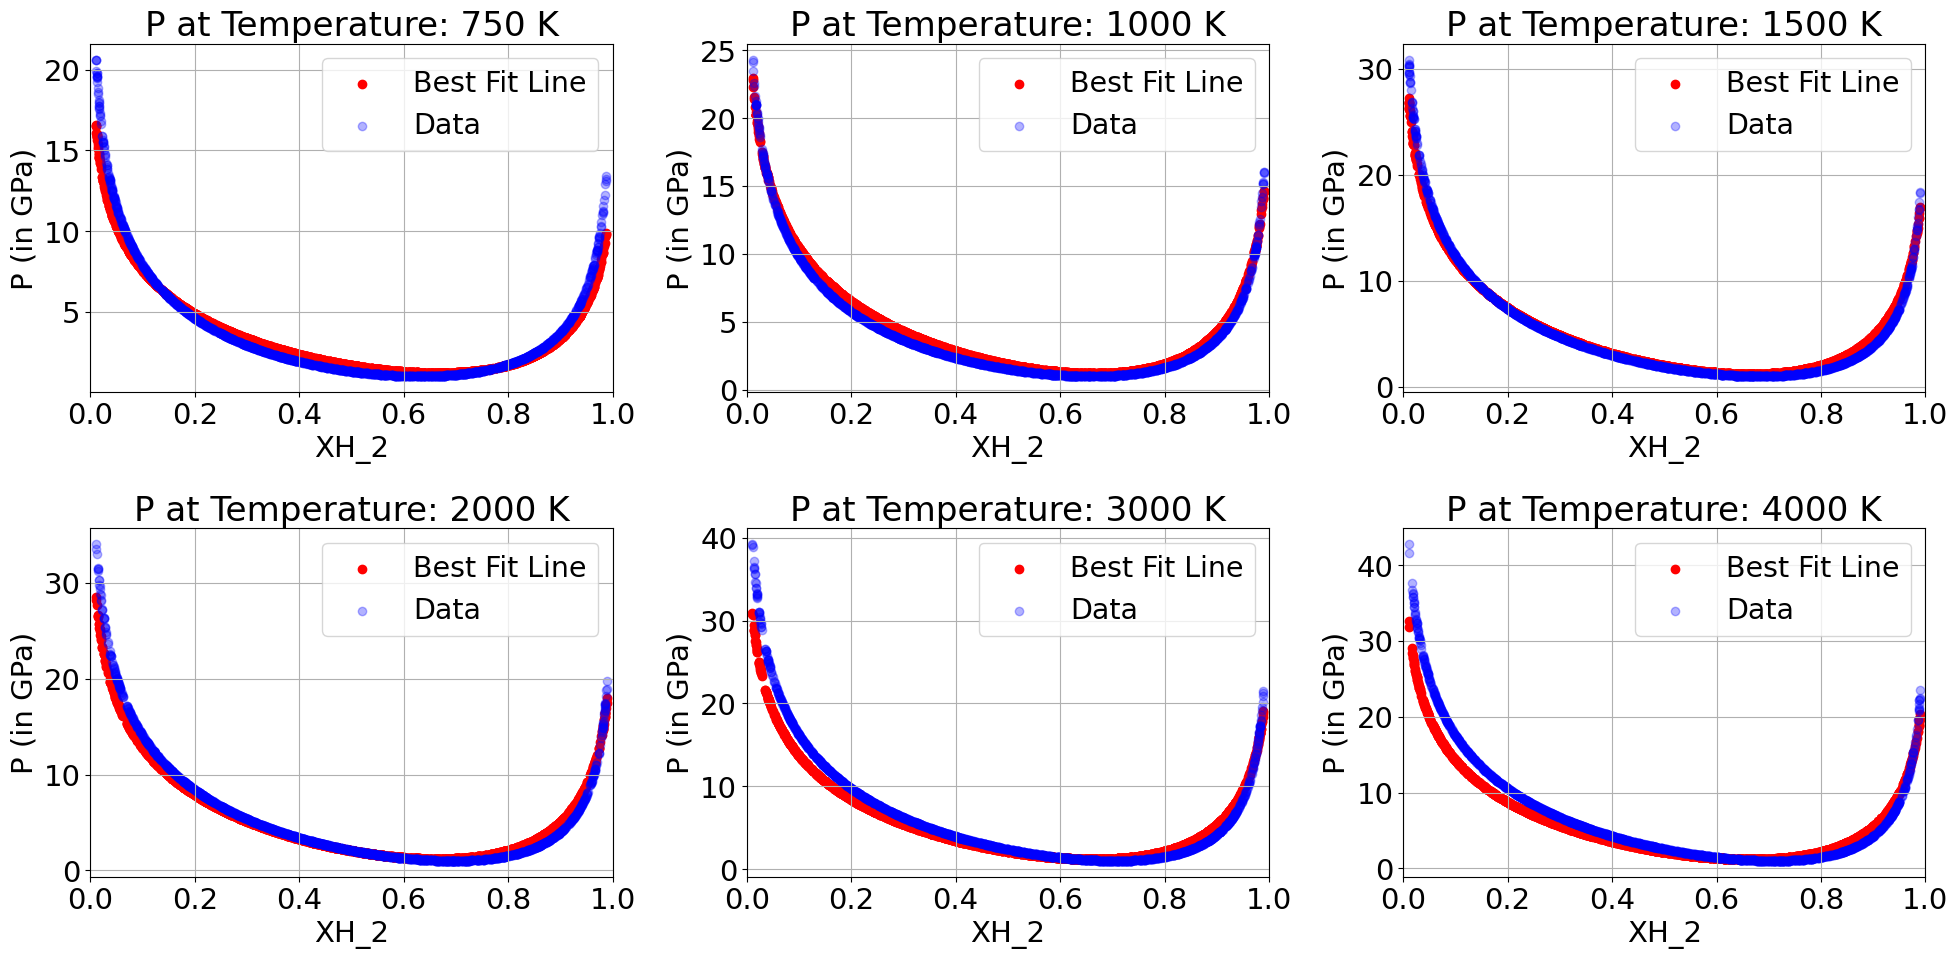

In [20]:
# Temperatures to loop over
temperatures = [750, 1000, 1500, 2000, 3000, 4000]
    
# Create figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.rcParams['font.size'] = 20.5

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_norm_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

    # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    Y_pred = np.abs(np.log(np.sin(np.tan(x0) + np.tan(x0))) * np.log(-698.6765 + x1)) - -1.2061266

    # Select subplot
    ax = axes[i // 3, i % 3] 
    
    # Plot the data and the best fit line
    ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel('XH_2')
    ax.set_ylabel('P (in GPa)')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()